# Keras Practice

In [1]:
## General packages
import pandas as pd
import numpy as np

## Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ML
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from keras.layers import LeakyReLU

Using TensorFlow backend.


In [25]:
df = pd.read_csv('StudentsPerformance.csv')

In [26]:
ml_df = pd.get_dummies(df, drop_first = True)
ml_df.loc[:, ['reading score', 'writing score']] = normalize(ml_df.loc[:, ['reading score', 'writing score']], axis = 0)

In [27]:
pca = PCA(n_components = 1)
pca_col = pca.fit_transform(ml_df.loc[:, ['reading score', 'writing score']])

In [28]:
ml_df.drop(columns = ['reading score', 'writing score'], inplace = True)
ml_df.loc[:, 'pca1'] = pca_col

In [29]:
ml_df

,math score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,pca1
0,72,0,1,0,0,0,1,0,0,0,0,1,1,-0.002830
1,69,0,0,1,0,0,0,0,0,1,0,1,0,-0.012975
2,90,0,1,0,0,0,0,0,1,0,0,1,1,-0.016159
3,47,1,0,0,0,0,0,0,0,0,0,0,1,0.011667
4,76,1,0,1,0,0,0,0,0,1,0,1,1,-0.005003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,0,0,0,0,1,0,0,1,0,0,1,0,-0.018048
996,62,1,0,1,0,0,0,1,0,0,0,0,1,0.008656
997,59,0,0,1,0,0,0,1,0,0,0,0,0,0.000444
998,68,0,0,0,1,0,0,0,0,1,0,1,0,-0.005662


In [30]:
def rmse(pred, y):
    
    rmse = np.sqrt(sum((y - pred)**2) / len(pred))
    
    return rmse

Prep data

In [31]:
X = ml_df.drop(columns = ['math score'])
y = ml_df.loc[:, 'math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05, random_state = 2)

Lasso Model

In [32]:
lasso = Lasso(alpha = .01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
lass_pred = lasso.predict(X_test)

In [34]:
lasso.coef_

array([ 1.17692759e+01,  3.68547880e-01,  0.00000000e+00,  4.73827594e-01,
        5.06735156e+00, -2.48444463e-01,  1.26291975e-02, -9.37830214e-01,
        3.81466912e-01, -6.78657416e-02,  4.31881395e+00,  1.89340351e+00,
       -1.33934421e+03])

In [35]:
rmse(lass_pred, y_test)

5.501374039273293

Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rand_for = RandomForestRegressor(n_estimators=1000, max_depth = 7, max_features = 5)
rand_for.fit(X_train, y_train)
rand_pred = rand_for.predict(X_test)

In [82]:
rmse(rand_pred, y_test)

6.257833106832176

In [60]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the fore

Keras Model

In [54]:
class TrainKerasModel:
    
    def __init__(self, data):
        
        self.data = data
        self.X = self.data.drop(columns = ['math score'])
        self.y = self.data.loc[:, 'math score']

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = .05, random_state = 2)
        
        
    def train(self, measurement = rmse, runs = 5):
        measurement_errors = list()

        for x in range(runs):
            model = Sequential()
            model.add(Dense(200, input_dim = 13, activation = 'relu'))
            model.add(Dense(150, activation = 'relu'))
            model.add(Dense(100, activation = 'relu'))
            model.add(Dense(50, activation = 'relu'))
            model.add(Dense(10, activation = 'relu'))
            model.add(Dense(5, activation = 'relu'))
            model.add(Dense(1, activation = 'linear'))

            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(self.X_train, self.y_train, epochs = 150, batch_size = 10, verbose=0)
            predictions = model.predict(self.X_test)
            measurement_errors.append(measurement(predictions.reshape(50), self.y_test))
    
        self.rmse_errors = measurement_errors
        self.predictions = predictions
        

In [55]:
keras = TrainKerasModel(ml_df)
keras.train(runs = 1)

In [56]:
keras.rmse_errors

[5.775424173406132]

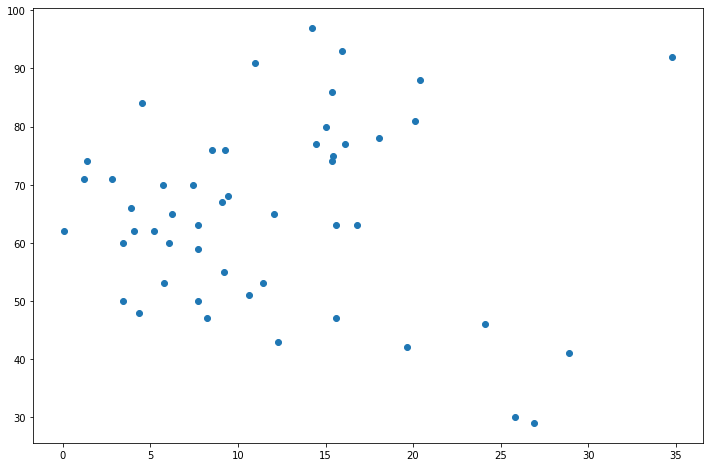

In [22]:
fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(abs(keras.y_test - keras.predictions.reshape(50)), keras.y_test)

ValueError: cannot reshape array of size 50 into shape (200,)

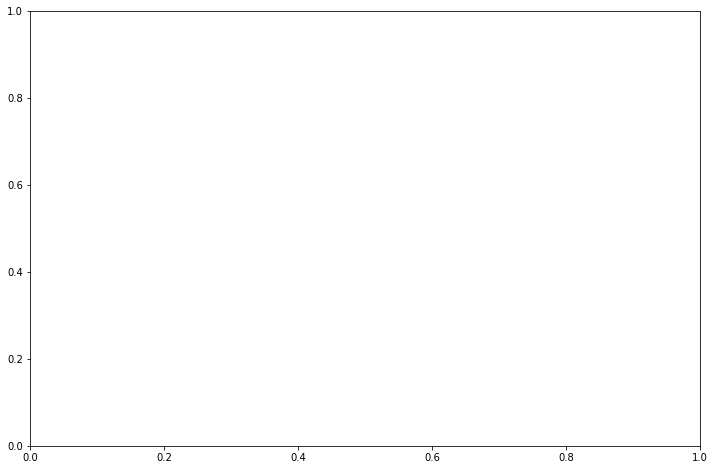

In [17]:
fig, ax = plt.subplots(figsize = (12,8))

sns.distplot(y_test - keras.predictions.reshape(200), bins = 20)